In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from time import sleep
import quandl as ql
from alpha_vantage.timeseries import TimeSeries
ql.ApiConfig.api_key = 'TvM-Jbzx938zxdKHUgxw'
alphaKey = 'QG9CR54Q5A0NVUV0'


In [5]:
#set up for alpha vantage api
ts = TimeSeries(alphaKey,output_format = 'pandas')

#testing for api
poly, meta = ts.get_daily(symbol='POLY.L', outputsize = 'full')

appledf = pd.DataFrame.from_dict(poly)
appledf.append(dict(zip(appledf.columns, appledf.columns)), ignore_index=True)
appledf.head()

,1. open,2. high,3. low,4. close,5. volume
date,,,,,
2020-03-20,1098.0,1217.0,1098.0,1154.5,1131507.0
2020-03-19,1084.0,1109.5,990.2,1039.5,3060849.0
2020-03-18,1118.5,1143.5,1043.5,1092.0,3220542.0
2020-03-17,1126.5,1151.5,1030.0,1151.5,4006370.0
2020-03-16,1175.0,1207.0,1102.0,1109.5,4043770.0


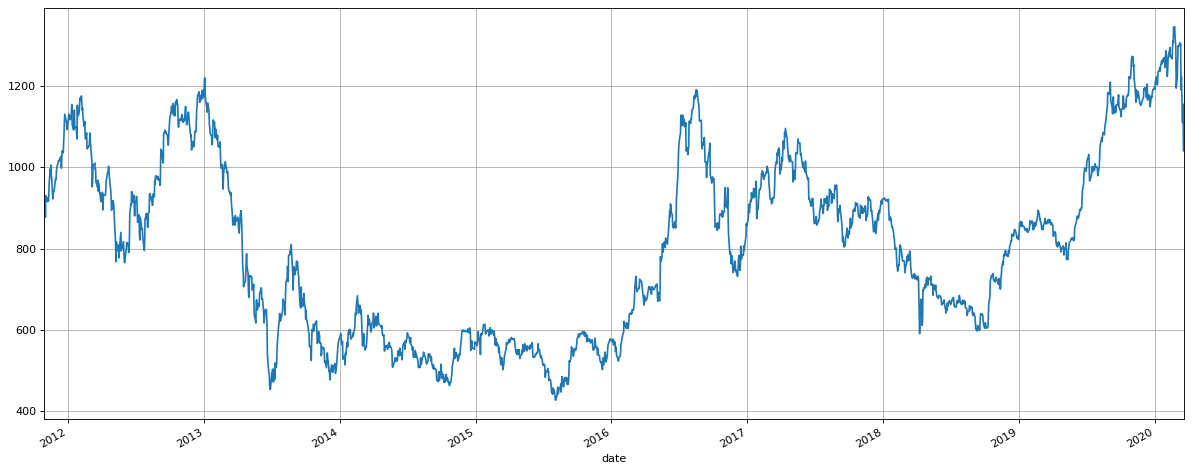

In [7]:
plt.figure(num=None, figsize=(15, 6), dpi=80, facecolor='w', edgecolor='k')
appledf['4. close'].plot()
plt.tight_layout()
plt.grid()
plt.show()

In [11]:
#pulling stock data for a stock 'name'
def importStockData(name):
    ts = TimeSeries(alphaKey,output_format = 'pandas')
    
    #pulls all availabe stock data as a pandas df
    stock, meta = ts.get_daily(symbol=name, outputsize = 'full')
    
    stock = stock.rename(columns={'1. open': "Open", '2. high': "High",'3. low':"Low",'4. close':"Close",'5. volume':"Volume",'date':'Date'})
    
    stock['Open'] = stock.Open.astype(float)
    stock['High'] = stock.High.astype(float)
    stock['Low'] = stock.Low.astype(float)
    stock['Close'] = stock.Close.astype(float)
    stock['Volume'] = stock.Volume.astype(int)
    stock['Date'] = stock.index.values
    stock['Day'] = stock.Date.dt.dayofyear
    stock['Year'] = stock.Date.dt.year
    
    #outputs a df with stock data since 2017
    stock19 = stock[stock['Year'] > 2016]
    stock19 = stock19.iloc[::-1]
    stock19 = stock19.reset_index(drop=True)
    
    return stock19



In [12]:
POLY19 = importStockData('POLY.L')
POLY19.head()

,Open,High,Low,Close,Volume,Date,Day,Year
0,857.0,876.0,849.500,872.0,1196591,2017-01-03,3,2017
1,883.0,897.0,862.500,889.5,1069831,2017-01-04,4,2017
2,901.5,916.5,882.452,908.5,1142966,2017-01-05,5,2017
3,905.0,905.0,885.000,888.0,709267,2017-01-06,6,2017
4,884.5,917.5,881.580,917.5,886039,2017-01-09,9,2017


In [15]:
#For pulling paladium data

plPrice = ql.get("JOHNMATT/PALL", start_date="2019-01-01", end_date="2019-12-31")

#To make palladium csv - in github
#plPrice.to_csv('plPrice17-19.csv')
plPrice

,Hong Kong 8:30,Hong Kong 14:00,London 09:00,New York 9:30
Date,,,,
2019-01-02,1277.0,1272.0,1267.0,1262.0
2019-01-03,1273.0,1273.0,1268.0,1262.0
2019-01-04,1275.0,1274.0,1275.0,1270.0
2019-01-07,1315.0,1319.0,1314.0,1302.0
2019-01-08,1315.0,1314.0,1315.0,1307.0
...,...,...,...,...
2019-12-24,1880.0,1889.0,1885.0,1876.0
2019-12-26,NaN,NaN,NaN,1898.0
2019-12-27,1916.0,1916.0,1917.0,1905.0


In [ ]:
#Lists of stock names in FTSE100 for each quarter of 2019
FTSEQ4 = ['III','ABF','ADM','AAL','ANTO','AHT','AZN','AUTO','AVV','AV','BA','BARC','BDEV','BKG','BHP','BP','BATS','BLND','BT-A','BNZL','BRBY','CCL','CNA','CCH','CPG','CRH','CRDA','DCC','DGE','EVR','EXPN','FERG','FLTR','FRES','GSK','GLEN','HLMA','HL','HSBA','HIK','HSX','IMB','INF','IHG','IAG','ITRK','ITV','JD','JMAT','KGF','LAND','LGEN','LLOY','LSE','MNG','MGGT','MRO','MNDI','MRW','NG','NXT','NMC','OCDO','PSON','PSN','PHNX','POLY','PRU','RB','REL','RTO','RIO','RMV','RR','RBS','RDSA','RDSB','RSA','SGE','SBRY','SDR','SMT','SGRO','SVT','SN','SMDS','SMIN','SKG','SPX','SSE','STAN','SLA','STJ','TW','TSCO','TUI','ULVR','UU','VOD','WTB','WPP']
FTSEQ3 = ['III','ABF','ADM','AAL','ANTO','AHT','AZN','AUTO','AVV','AV','BA','BARC','BDEV','BKG','BHP','BP','BATS','BLND','BT-A','BNZL','BRBY','CCL','CNA','CCH','CPG','CRH','CRDA','DCC','DGE','DLG','EVR','EXPN','FERG','FLTR','FRES','GSK','GLEN','HLMA','HL','HSBA','HSX','IMB','INF','IHG','IAG','ITRK','ITV','JD','JMAT','KGF','LAND','LGEN','LLOY','LSE','MCRO','MKS','MNG','MRO','MNDI','MRW','NG','NXT','NMC','OCDO','PSON','PSN','PHNX','PRU','RB','REL','RTO','RIO','RMV','RR','RBS','RDSA','RDSB','RSA','SGE','SBRY','SDR','SMT','SGRO','SVT','SN','SMDS','SMIN','SKG','SPX','SSE','STAN','SLA','STJ','TW','TSCO','TUI','ULVR','UU','VOD','WTB','WPP']
FTSEQ2 = ['III','ABF','ADM','AAL','ANTO','AHT','AZN','AUTO','AV','BA','BARC','BDEV','BKG','BHP','BP','BATS','BLND','BT-A','BNZL','BRBY','CCL','CNA','CCH','CPG','CRH','CRDA','DCC','DGE','DLG','EVR','EZJ','EXPN','FERG','FLTR','FRES','GSK','GLEN','HIK','HLMA','HL','HSBA','HSX','IMB','INF','IHG','IAG','ITRK','ITV','JMAT','KGF','LAND','LGEN','LLOY','LSE','MCRO','MKS','MNG','MRO','MNDI','MRW','NG','NXT','NMC','OCDO','PSON','PSN','PHNX','PRU','RB','REL','RTO','RIO','RMV','RR','RBS','RDSA','RDSB','RSA','SGE','SBRY','SDR','SMT','SGRO','SVT','SN','SMDS','SMIN','SKG','SPX','SSE','STAN','SLA','STJ','TW','TSCO','TUI','ULVR','UU','VOD','WTB','WPP']
FTSEQ1 = ['III','ABF','ADM','AAL','ANTO','AHT','AZN','AUTO','AV','BA','BARC','BDEV','BKG','BHP','BP','BATS','BLND','BT-A','BNZL','BRBY','CCL','CNA','CCH','CPG','CRH','CRDA','DCC','DGE','DLG','EVR','EZJ','EXPN','FERG','FLTR','FRES','GSK','GLEN','GVC','HLMA','HL','HSBA','HSX','IMB','INF','IHG','IAG','ITRK','ITV','JMAT','KGF','LAND','LGEN','LLOY','LSE','MCRO','MKS','MNG','MRO','MNDI','MRW','NG','NXT','NMC','OCDO','PSON','PSN','PRU','RB','REL','RTO','RIO','RMV','RR','RBS','RDSA','RDSB','RSA','SGE','SBRY','SDR','SMT','SGRO','SVT','SN','SMDS','SMIN','SKG','SPX','SSE','STAN','SLA','STJ','TW','TSCO','TUI','ULVR','UU','VOD','WG','WTB','WPP']

#list of all stocks in FTSE100 over the year 
allStocks19 = list(np.unique(np.asarray(FTSEQ1+FTSEQ2+FTSEQ3+FTSEQ4)))

newStocks19 = list(set(allStocks19).difference(FTSEQ4))
newStocks19



In [ ]:
#adds .L to stock name to change it to international stock code used by API
newDifference = ['{}.L'.format(a) for a in newStocks19]
newDifference

In [13]:
#pulls stocks from list of names and exports them as CSVs - find all stocks (allStocks19) as CSVs on github
'''
for idx,stock in enumerate(newDifference):
    
    if idx > -1:
        print(stock)
        stockdf = importStockData(stock)
        stockdf.to_csv('{0}17-20.csv'.format(stock))
        sleep(12)
'''


"\nfor idx,stock in enumerate(newDifference):\n    \n    if idx > -1:\n        print(stock)\n        stockdf = importStockData(stock)\n        stockdf.to_csv('{0}17-20.csv'.format(stock))\n        sleep(12)\n"

In [17]:
#adds date and day columns from index column
plPrice['Date'] = pd.to_datetime(plPrice.index.values.astype('M8[D]'))
plPrice['Day'] = plPrice['Date'].dt.dayofyear
plPrice.head()

,Hong Kong 8:30,Hong Kong 14:00,London 09:00,New York 9:30,Date,Day
Date,,,,,,
2019-01-02,1277.0,1272.0,1267.0,1262.0,2019-01-02,2
2019-01-03,1273.0,1273.0,1268.0,1262.0,2019-01-03,3
2019-01-04,1275.0,1274.0,1275.0,1270.0,2019-01-04,4
2019-01-07,1315.0,1319.0,1314.0,1302.0,2019-01-07,7
2019-01-08,1315.0,1314.0,1315.0,1307.0,2019-01-08,8


       Open    High       Low   Close   Volume       Date  Day  Year
0     857.0   876.0   849.500   872.0  1196591 2017-01-03    3  2017
1     883.0   897.0   862.500   889.5  1069831 2017-01-04    4  2017
2     901.5   916.5   882.452   908.5  1142966 2017-01-05    5  2017
3     905.0   905.0   885.000   888.0   709267 2017-01-06    6  2017
4     884.5   917.5   881.580   917.5   886039 2017-01-09    9  2017
..      ...     ...       ...     ...      ...        ...  ...   ...
810  1175.0  1207.0  1102.000  1109.5  4043770 2020-03-16   76  2020
811  1126.5  1151.5  1030.000  1151.5  4006370 2020-03-17   77  2020
812  1118.5  1143.5  1043.500  1092.0  3220542 2020-03-18   78  2020
813  1084.0  1109.5   990.200  1039.5  3060849 2020-03-19   79  2020
814  1098.0  1217.0  1098.000  1150.0  1148674 2020-03-20   80  2020

[815 rows x 8 columns]


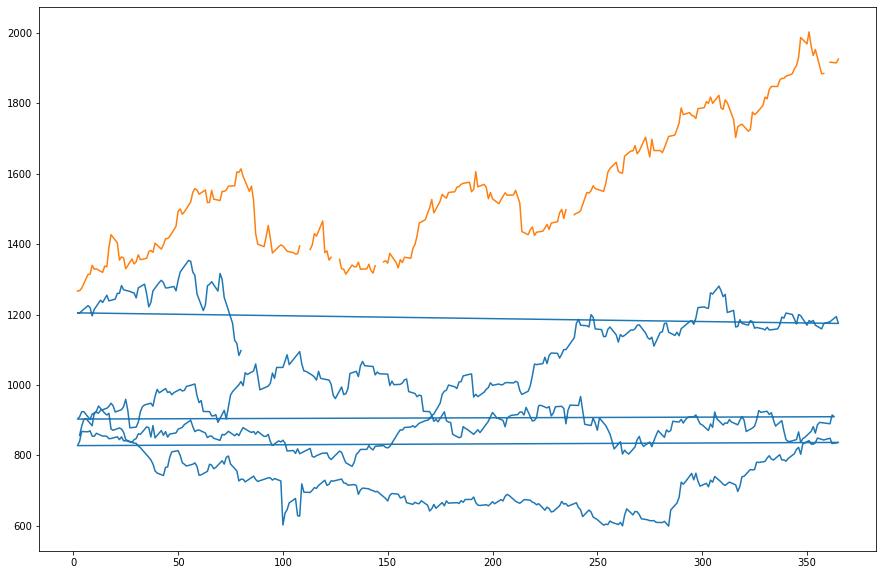

In [18]:
POLY19 = importStockData('POLY.L')
print(POLY19)
f = plt.figure(figsize=(15,10))
axs = f.add_subplot(111)
axs.plot(POLY19['Day'], POLY19['Open'])
axs.plot(plPrice['Day'],plPrice['London 09:00'])
plt.show()